In [67]:
import polars as pl
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import matplotlib.pyplot as plt

In [68]:
log_dir = "runs/imdb_new_bs8_sl2048"

event_acc = EventAccumulator(log_dir)
event_acc.Reload()

event_acc.Tags()

{'images': [],
 'audio': [],
 'histograms': [],
 'scalars': ['Loss/train_batch',
  'Accuracy/train_batch',
  'Loss/train_epoch',
  'Accuracy/train_epoch',
  'Precision/train',
  'Recall/train',
  'F1/train'],
 'distributions': [],
 'tensors': [],
 'graph': False,
 'meta_graph': False,
 'run_metadata': []}

In [89]:
accuracy_data = event_acc.Scalars("Accuracy/train_batch")
df = pl.DataFrame(accuracy_data)
df.head(3)

wall_time,step,value
f64,i64,f64
1.7359e9,0,0.375
1.7359e9,1,0.75
1.7359e9,2,0.375


In [90]:
# smoothing
smoothing_factor = 0.01
window_size = 10
df = df.with_columns((pl.col("value").ewm_mean(alpha=smoothing_factor, adjust=False)).alias("smoothed_accuracy"))
df.head()

wall_time,step,value,smoothed_accuracy
f64,i64,f64,f64
1.7359e9,0,0.375,0.375
1.7359e9,1,0.75,0.37875
1.7359e9,2,0.375,0.378712
1.7359e9,3,0.625,0.381175
1.7359e9,4,0.375,0.381114


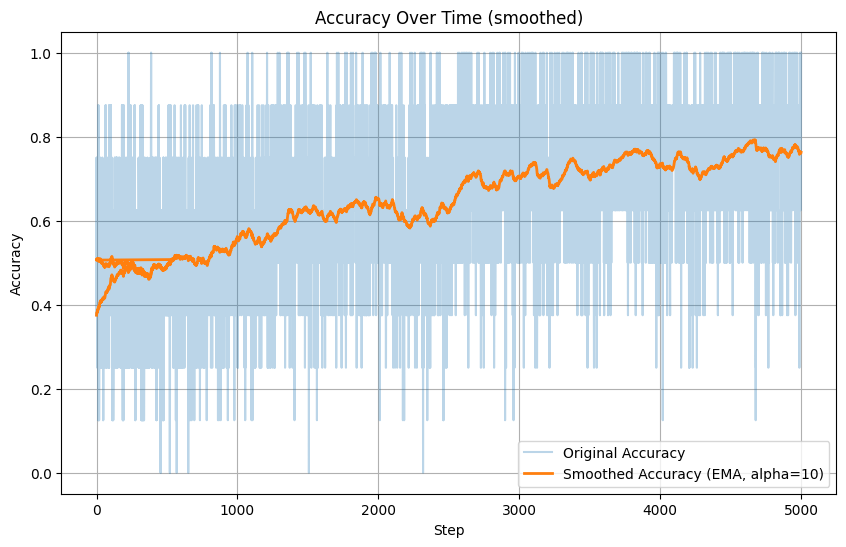

In [91]:
plt.figure(figsize=(10, 6))
plt.plot(df["step"], df["value"], label="Original Accuracy", alpha=0.3)
plt.plot(df["step"], df["smoothed_accuracy"], label=f"Smoothed Accuracy (EMA, alpha={window_size})", linewidth=2)
plt.xlabel("Step")
plt.ylabel("Accuracy")
plt.title("Accuracy Over Time (smoothed)")
plt.legend()
plt.grid(True)
plt.show()